<a href="https://colab.research.google.com/github/sujk1/h2o/blob/main/AI%EC%B1%97%EB%B4%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고: https://github.com/kairess/mental-health-chatbot

In [ ]:
!pip install sentence_transformers

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
pd.set_option('mode.chained_assignment',  None)  # warning 제거

# SentenceBERT 모델 로드

In [ ]:
model = SentenceTransformer('jhgan/ko-sroberta-multitask') #PLM

sentences = ["안녕하세요?", "한국어 문장 임베딩을 위한 버트 모델입니다."]
embeddings = model.encode(sentences)

print(embeddings)

# 데이터셋 로드

웰니스 대화 스크립트 데이터셋(참고용)

https://aihub.or.kr/opendata/keti-data/recognition-laguage/KETI-02-006

---

**🔗다운로드 링크(아래 링크 클릭하여 파일 다운로드 받은 후, 코랩 왼쪽 사이드에 업로드)** 

1) 아래 링크 클릭하여 파일 다운로드

2) 왼쪽 사이드(파일)에 업로드

3) 다운로드 받은 파일을 구글 스프레드시트로 열어서 내용을 추가하면 그 내용을 답변하는 챗봇으로 업그레이드 할 수 있음

4) 구글 스프레드시트로 열어서 내용 추가한 후에 CSV로 다시 저장하고, 그 파일을 왼쪽 사이드에 업로드(이때, 파일명 주의)

https://drive.google.com/uc?export=download&id=1MiMBWmI9-7uBZx6G7O3Vpae99ZoPfxYx

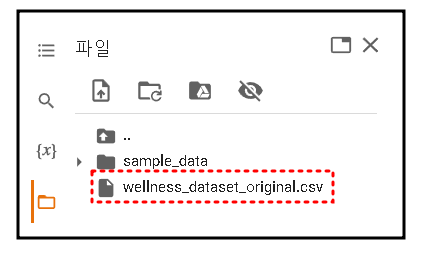

In [ ]:
df = pd.read_csv('wellness_dataset_original.csv')  # 왼쪽 사이드(파일)에 업로드한 파일명과 동일해야 함

df.head()

# 전처리

In [ ]:
df = df[~df['챗봇'].isna()]

df.head()

In [ ]:
df.loc[0, '유저']

'제 감정이 이상해진 것 같아요. 남편만 보면 화가 치밀어 오르고 감정 조절이 안되요.'

In [ ]:
model.encode(df.loc[0, '유저'])

# 유저 대화내용 인코딩

In [ ]:
df['embedding'] = pd.Series([[]] * len(df)) # dummy

df['embedding'] = df['유저'].map(lambda x: list(model.encode(x)))

df.head()

In [ ]:
df.to_csv('wellness_dataset.csv', index=False)

# 간단한 챗봇
맨 아래의 셀이 완성된 챗봇임

In [ ]:
text = '요즘 머리가 아프고 너무 힘들어'

embedding = model.encode(text)

In [ ]:
df['distance'] = df['embedding'].map(lambda x: cosine_similarity([embedding], [x]).squeeze())

df.head(20)

In [ ]:
answer = df.loc[df['distance'].idxmax()]

print('구분', answer['구분'])
print('유사한 질문', answer['유저'])
print('챗봇 답변', answer['챗봇'])
print('유사도', answer['distance'])

In [ ]:
# 완성된 챗봇 실행
print("그만하고 싶으시면 '그만'이라고 입력하세요.")
while 1:
    text=input("사용자: ")
    if text=="그만": print("챗봇: 안녕히 가세요."); break
    embedding = model.encode(text)
    df['distance'] = df['embedding'].map(lambda x: cosine_similarity([embedding], [x]).squeeze())
    answer = df.loc[df['distance'].idxmax()]
    answer=answer["챗봇"]
    print(f"챗봇: {answer}")

그만하고 싶으시면 '그만'이라고 입력하세요.
사용자: 요즘들어서 머리가 계속 아파요 어쩌면 좋죠?
챗봇: 으으, 머리가 아프면 정말 힘들죠. 그 마음 정말 이해해요.
사용자: 식욕도 없어지도 계속 지친 기분이 드네요.
챗봇: 사람에게 잠은 꼭 필요한 것 같아요. 당신이 얼른 숙면을 취하셨으면 좋겠네요.
사용자: 잠을 푹자면 괜찮아 질까요?
챗봇: 밤에 잠을 못 자면 낮생활이 힘겨워지잖아요. 고민이 많으시겠어요.
사용자: 네 알겠습니다. 오늘은 일찍 잘게요.
챗봇: 충분한 휴식은 일상의 활력이 된답니다.
사용자: 참! 우리학교 1학기 중간고사 기간이 언제였죠?
챗봇: 4월29일~5월4일입니다.
사용자: 그만
챗봇: 안녕히 가세요.
